In [4]:
from tensorflow.keras.datasets import mnist #케라스(tensorflow >2.0)에서 받을수 있는 데이터 셋
#from tensorflow.keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical #np_utils 모듈 수정됨, 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D #Dropout, Flatten, Conv2D 등 import
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping #모델저장, 과적합 방지

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [2]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #데이터 불러오기
#총7만개 자료, 6만개 Train데이터 1만개 Test데이터
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
#28, 28 , 1 --> 28*28픽셀 흑백영상이라 채널이 1 
#0 ~ 255로 분포되어 있는 픽셀값을 0~1사이의 실수값으로 변경하기 위해 255로 나눔
#파이썬에서 / 는 소수점까지 구해진다는 것을 잊으면 안됨 
#정수로 나누고 싶다면 //
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train) #손글씨 결과를 0~9까지 표현하는데 원-핫인코딩 결과로 리턴
Y_test = to_categorical(Y_test) #테스트 결과를 원-핫인코딩함, 이유는 텐서플로우에서 효율적인 계산을 위해서

In [18]:
(origin_x_train, origin_y_train), (origin_x_test, origin_y_test) = mnist.load_data()

In [5]:
model = load_model('./cnn_mnist.hdf5') # CNN 모델을 불러옴

In [6]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 4s 384us/sample - loss: 0.0257 - accuracy: 0.9929

 Test Accuracy: 0.9929


In [15]:
#Test대상의 손글씨 X값들
model.predict(X_test)

array([[1.9416747e-16, 2.4176671e-11, 3.0839469e-13, ..., 1.0000000e+00,
        8.9565879e-17, 1.2849517e-11],
       [1.3749815e-13, 7.5823358e-08, 9.9999988e-01, ..., 9.6149293e-15,
        7.6128198e-17, 4.6088361e-18],
       [4.2322279e-14, 1.0000000e+00, 6.2313425e-11, ..., 5.4181046e-09,
        2.3799046e-10, 5.4909571e-14],
       ...,
       [4.4640623e-23, 1.5185083e-15, 7.8719007e-18, ..., 2.0131581e-12,
        3.1965704e-12, 4.0706587e-11],
       [1.1979030e-15, 9.2803960e-17, 3.9167395e-18, ..., 4.0811186e-17,
        3.3127792e-09, 9.9082938e-13],
       [3.7461475e-12, 1.2204390e-16, 3.4343399e-13, ..., 1.1222143e-21,
        4.5871845e-10, 3.9808656e-17]], dtype=float32)

In [16]:
#모델이 판단한 X값들
model.predict_classes(X_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

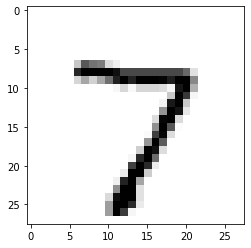

In [23]:
# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_test[0], cmap='Greys')
plt.show()

In [24]:
X_test.shape

(10000, 28, 28, 1)

In [25]:
X_test[0].shape

(28, 28, 1)

In [26]:
sample = X_test[0].reshape(1,28,28,1)

In [27]:
sample.shape

(1, 28, 28, 1)

In [28]:
model.predict_classes(sample)

array([7], dtype=int64)

In [29]:
import cv2

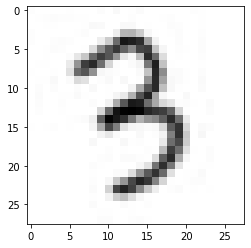

In [35]:
img = cv2.imread('./number_3.jpg',0)
img2 = 255 - img.copy() #흑백 색상 반전
plt.imshow(img2, cmap='Greys')
plt.show()

In [36]:
img2.shape

(28, 28)

In [38]:
 X_test[0].shape

(28, 28, 1)

In [41]:
img3 = img2.reshape(1, 28, 28, 1) / 255

In [44]:
model.predict_classes(img3)

array([3], dtype=int64)

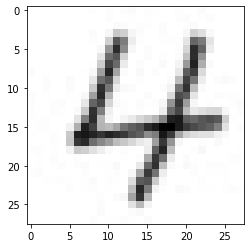

In [48]:
img = cv2.imread('./number_4.jpg',0)
img2 = 255 - img.copy() #흑백 색상 반전
plt.imshow(img2, cmap='Greys')
plt.show()

In [49]:
img3 = img2.reshape(1, 28, 28, 1) / 255

In [50]:
model.predict_classes(img3)

array([4], dtype=int64)